## Case Study: The Market Model (Single Factor Model), Part 2

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann, lecture 360, __[Case Study (Part 3): The Market Model (Single Factor Model)](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/learn/lecture/17481304#overview)__.)*

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

Now let's get back to our case study, the market model of single factor model for the Microsoft stock.

What we're trying to do here is explaining the variation in the Microsoft returns as the dependent variable by the returns of a well-diversified market portfolio as the independent variable (the the S&P 500 index).

In part one of our case study we've already calculated the regression coefficients. Now we want to determine the fit of our model with R<sup>2</sup> (R-squared) and perform a t-test to verify whether the S&P 500 returns explain the returns of the Microsoft stock with *statistical significance*.

In [2]:
df = yf.download(["MSFT", "^SP500TR"], start = "2015-12-31", end = "2018-12-31")

[*********************100%***********************]  2 of 2 completed


In [3]:
df

Price       Adj Close                    Close                     High  \
Ticker           MSFT     ^SP500TR        MSFT     ^SP500TR        MSFT   
Date                                                                      
2015-12-31  48.937237  3821.600098   55.480000  3821.600098   56.189999   
2016-01-04  48.337410  3763.989990   54.799999  3763.989990   54.799999   
2016-01-05  48.557922  3771.570068   55.049999  3771.570068   55.389999   
2016-01-06  47.675877  3723.439941   54.049999  3723.439941   54.400002   
2016-01-07  46.017570  3635.290039   52.169998  3635.290039   53.490002   
...               ...          ...         ...          ...         ...   
2018-12-21  92.586571  4802.509766   98.230003  4802.509766  103.000000   
2018-12-24  88.722122  4672.660156   94.129997  4672.660156   97.970001   
2018-12-26  94.782700  4904.490234  100.559998  4904.490234  100.690002   
2018-12-27  95.367096  4946.939941  101.180000  4946.939941  101.190002   
2018-12-28  94.622490  4941.609863  100.389999  4941.609863  102.410004   

Price                          Low                     Open               \
Ticker         ^SP500TR       MSFT     ^SP500TR        MSFT     ^SP500TR   
Date                                                                       
2015-12-31  3856.370117  55.419998  3821.090088   56.040001  3852.739990   
2016-01-04  3811.739990  53.389999  3721.040039   54.320000  3811.739990   
2016-01-05  3781.270020  54.540001  3748.149902   54.930000  3766.080078   
2016-01-06  3763.550049  53.639999  3702.469971   54.320000  3763.550049   
2016-01-07  3714.290039  52.070000  3627.320068   52.700001  3714.290039   
...                 ...        ...          ...         ...          ...   
2018-12-21  4976.560059  97.459999  4787.040039  101.629997  4899.410156   
2018-12-24  4790.000000  93.980003  4672.660156   97.680000  4770.950195   
2018-12-26  4904.609863  93.959999  4664.089844   95.139999  4696.629883   
2018-12-27  4946.939941  96.400002  4766.390137   99.300003  4854.870117   
2018-12-28  5010.160156  99.519997  4916.640137  102.089996  4967.520020   

Price          Volume           
Ticker           MSFT ^SP500TR  
Date                            
2015-12-31   27334100        0  
2016-01-04   53778000        0  
2016-01-05   34079700        0  
2016-01-06   39518900        0  
2016-01-07   56564900        0  
...               ...      ...  
2018-12-21  111242100        0  
2018-12-24   43935200        0  
2018-12-26   51634800        0  
2018-12-27   49498500        0  
2018-12-28   38196300        0  

[754 rows x 12 columns]

In [4]:
df = df["Adj Close"] # selecting the adjusted close prices to have the total return

In [5]:
df

Ticker,MSFT,^SP500TR
Date,,
2015-12-31,48.937237,3821.600098
2016-01-04,48.337410,3763.989990
2016-01-05,48.557922,3771.570068
2016-01-06,47.675877,3723.439941
2016-01-07,46.017570,3635.290039
...,...,...
2018-12-21,92.586571,4802.509766
2018-12-24,88.722122,4672.660156
2018-12-26,94.782700,4904.490234


In [6]:
df = df.rename(columns = {"^SP500TR":"SPX"}) # renaming the column name

In [7]:
df

Ticker,MSFT,SPX
Date,,
2015-12-31,48.937237,3821.600098
2016-01-04,48.337410,3763.989990
2016-01-05,48.557922,3771.570068
2016-01-06,47.675877,3723.439941
2016-01-07,46.017570,3635.290039
...,...,...
2018-12-21,92.586571,4802.509766
2018-12-24,88.722122,4672.660156
2018-12-26,94.782700,4904.490234


In [8]:
ret = df.pct_change().dropna() # calculating daily returns with pct_change() and dropna()

In [9]:
ret # the returns dataFrame

Ticker,MSFT,SPX
Date,,
2016-01-04,-0.012257,-0.015075
2016-01-05,0.004562,0.002014
2016-01-06,-0.018165,-0.012761
2016-01-07,-0.034783,-0.023674
2016-01-08,0.003067,-0.010833
...,...,...
2018-12-21,-0.032312,-0.020588
2018-12-24,-0.041739,-0.027038
2018-12-26,0.068310,0.049614


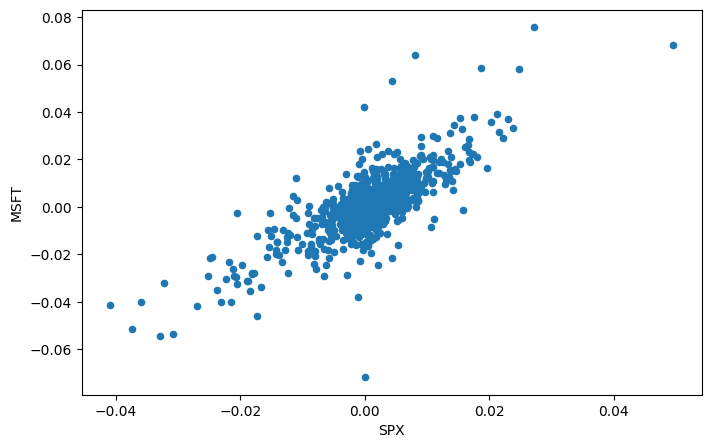

In [10]:
ret.plot(x = "SPX", y = "MSFT", figsize = (8, 5), kind = "scatter")
plt.show()

In [11]:
model = ols("MSFT ~ SPX", data=ret) # creating the regression model from the returns dataframe

In [12]:
results = model.fit() # fitting the model

In [13]:
print(results.summary()) # printing the summary table

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1180.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          3.43e-156
Time:                        14:25:56   Log-Likelihood:                 2489.8
No. Observations:                 753   AIC:                            -4976.
Df Residuals:                     751   BIC:                            -4966.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.444      0.1

__What we can read from the summary table for our regression:__

- we have an Ordinary Least Squares (OLS) regression

- the dependent variable is MSFT (Microsoft)

- we have 753 observations

- we have an r-squared of 61.1 %, which is pretty good and pretty high for the market model

__Regression coefficients:__

- the interceptors very close to zero with a t-statistic of 1.44 and a p-value of 0.149 which is close to zero
  - so here we can conclude that we shouldn't reject the null hypothesis

- we can see that the intercept is equal to zero and also for the confidence interval, we can see that the interceptors are very close to zero

- we have a slope coefficient (SPX ) of 1.3582 which is actually the beta factor for the Microsoft stock
  - here we have a quite high t-statistic (34.356), resulting in a very low p-value
  - so we should reject the null hypothesis that the slope coefficient is equal to zero

***We can conclude, that the S&P 500 returns explained the returns of the Microsoft stock with statistical significance.***

The point estimate for the beta factor is 1.3582 and having a look at the confidence interval estimate, the probability is 95 % that the true beta factor is between 1.281 and 1.436.